In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torch.utils.data.dataloader import DataLoader
import numpy as np
from torchvision.models import resnet18

## Download Data and Pretrained Weights

In [5]:
net = resnet18(pretrained=False)
net.load_state_dict(torch.load('model.pt'))

In [4]:
from torchvision.datasets import CIFAR10

In [6]:
cif = CIFAR10('.', download=True, transform=transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()]))
dl = DataLoader(cif, batch_size=128)

Files already downloaded and verified


In [7]:
# test network pipeline
for x, y in dl:   
    net(x)
    break

In [8]:
x.shape

torch.Size([128, 3, 224, 224])

## Visualization Pipeline

In [9]:
from visualize_feature import visualize_feats
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [10]:
modules = [('layer4', 0)]
input_args = {'shape': (1, 3, 224, 224)}

In [11]:
imgs = visualize_feats(net, *modules, num_updates=1, **input_args)

In [12]:
img = imgs[0]

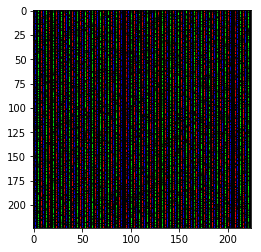

In [13]:
plt.imshow(img)

## Train the Model

In [15]:
lr = 0.001
xent = torch.nn.CrossEntropyLoss()
optim = torch.optim.Adam(net.parameters(), lr=lr)
n_epochs = 5
for epoch in range(n_epochs):
    for i, (x, y) in enumerate(dl):
        optim.zero_grad()
        out = net(x)
        loss = xent(out, y)
        loss.backward()
        optim.step()
        if i % 10 == 0:
            print('Epoch: {}/{}, Batch: {}/{}, Loss: {}'.format(epoch + 1, n_epochs, i + 1, len(dl), loss))

Epoch: 1/5, Batch: 1/391, Loss: 2.0499980449676514


KeyboardInterrupt: 

In [17]:
net

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [19]:
torch.save(net.state_dict(), 'model.pt')

In [21]:
net.load_state_dict(torch.load('model.pt'))